In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from DSHelper import CatEncoder

In [2]:
#Import data
#Import data
train = pd.read_csv('SupportingFiles/train_houseprices.csv')
test = pd.read_csv('SupportingFiles/test_houseprices.csv')
# Get Ids for test
test_ids = test[["Id"]]
#Drop all Ids
test.drop(columns=['Id'], inplace= True)
train.drop(columns=['Id'], inplace= True)
#Combine data sets
combine =  pd.concat([train,test], sort = 'True')
#get independent variable for sale price
y = train['SalePrice']

# Data Cleaning
- Remove Nulls
- Normalize Data

In [3]:
# Check to see what data has null values
nulls= combine.isnull().sum()/len(combine) * 100
nulls[nulls > 0]

Alley           93.216855
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtFinType1     2.706406
BsmtFinType2     2.740665
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
BsmtQual         2.774923
BsmtUnfSF        0.034258
Electrical       0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
Fence           80.438506
FireplaceQu     48.646797
Functional       0.068517
GarageArea       0.034258
GarageCars       0.034258
GarageCond       5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
GarageYrBlt      5.447071
KitchenQual      0.034258
LotFrontage     16.649538
MSZoning         0.137033
MasVnrArea       0.787941
MasVnrType       0.822199
MiscFeature     96.402878
PoolQC          99.657417
SalePrice       49.982871
SaleType         0.034258
TotalBsmtSF      0.034258
Utilities        0.068517
dtype: float64

Drop Rows where there are only a few instances of nulls

In [4]:
nulls[nulls > 0].index

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

In [5]:
# Take care of null values

# Lot Frontage is repalced with median
combine['LotFrontage'].fillna(combine['LotFrontage'].median(), inplace=True)

# Alley way nulls are replaced with "None"
combine['Alley'].fillna('none',inplace=True)

# Garage Year Built is replaced with yearbuilt if it is null
combine['GarageYrBlt'].fillna(train['YearBuilt'], inplace=True)

# Fill MasVnrARea with 0 and msnvnr type with none
combine['MasVnrArea'].fillna(0, inplace=True)
combine['MasVnrType'].fillna('none',inplace=True)

# Change basement values to none
combine['BsmtQual'].fillna('none',inplace=True)
combine['BsmtCond'].fillna('none',inplace=True)
combine['BsmtExposure'].fillna('none',inplace=True)
combine['BsmtFinType1'].fillna('none',inplace=True)
combine['BsmtFinType2'].fillna('none',inplace=True)

# Electrical replace with mode
combine['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

# Replace nulls with none for fireplace
combine['FireplaceQu'].fillna('none',inplace=True)

# Replace nulls with none for garage attributes
combine['GarageType'].fillna('none',inplace=True)
combine['GarageFinish'].fillna('none',inplace=True)
combine['GarageQual'].fillna('none',inplace=True)
combine['GarageCond'].fillna('none',inplace=True)

# PoolQC nulls filled with none
combine['PoolQC'].fillna('none',inplace=True)

# Fence nulls filled with none
combine['Fence'].fillna('none',inplace=True)

# Miscellaneious feature nulls filled with none
combine['MiscFeature'].fillna('none',inplace=True)

# Others:
combine['Utilities'].fillna(combine['Utilities'].mode()[0], inplace=True)
combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0], inplace=True)
combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0], inplace=True)
combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0], inplace=True)
combine['SaleType'].fillna(combine['SaleType'].mode()[0], inplace=True)
combine['Functional'].fillna(combine['Functional'].mode()[0], inplace=True)
combine['MSZoning'].fillna(combine['MSZoning'].mode()[0], inplace=True)
combine['BsmtFinSF1'].fillna(combine['BsmtFinSF1'].median(), inplace=True)
combine['BsmtFullBath'].fillna(combine['BsmtFullBath'].median(), inplace=True)
combine['GarageCars'].fillna(combine['GarageCars'].mode()[0], inplace=True)
combine['BsmtFinSF2'].fillna(combine['BsmtFinSF2'].median(), inplace=True)
combine['BsmtHalfBath'].fillna(combine['BsmtHalfBath'].median(), inplace=True)
combine['GarageArea'].fillna(combine['GarageArea'].mode()[0], inplace=True)
combine['BsmtUnfSF'].fillna(combine['BsmtUnfSF'].median(), inplace=True)
combine['TotalBsmtSF'].fillna(combine['TotalBsmtSF'].median(), inplace=True)

In [6]:
# Check nulls again
nulls= combine.isnull().sum()/len(combine) * 100
print(nulls[nulls > 0])

SalePrice    49.982871
dtype: float64


In [7]:
#Split Training data
train = combine[combine['SalePrice'].notnull()]

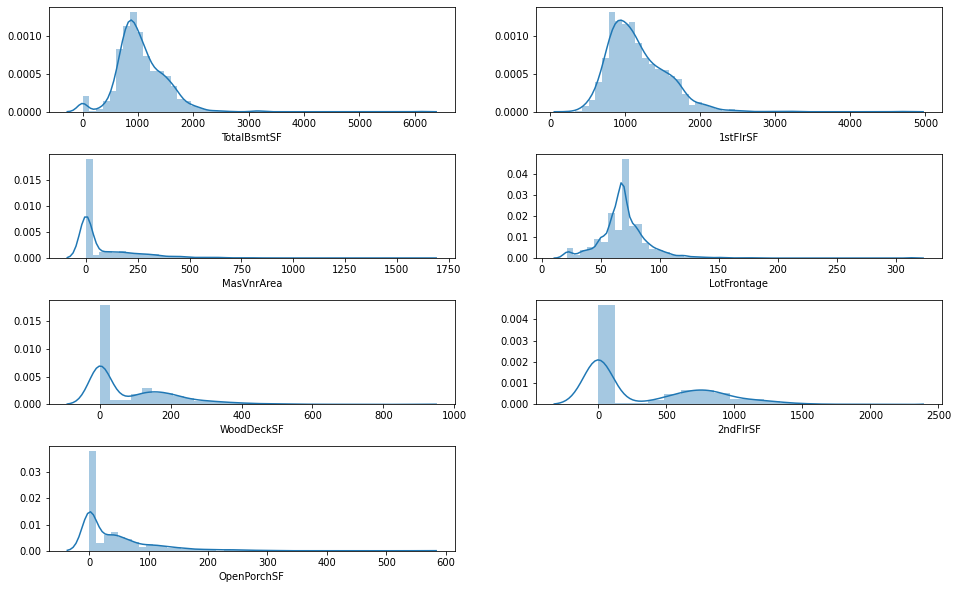

In [8]:
# Check Distrbutions for ouliers numerical data
plt.figure(figsize= (16,10))
fig= plt.subplot
plt.subplots_adjust(hspace = 0.4)
plt.subplot(421)
sns.distplot(train['TotalBsmtSF'])


plt.subplot(422)
sns.distplot(train['1stFlrSF'])


plt.subplot(423)
sns.distplot(train['MasVnrArea'])


plt.subplot(424)
sns.distplot(train['LotFrontage'])


plt.subplot(425)
sns.distplot(train['WoodDeckSF'])


plt.subplot(426)
sns.distplot(train['2ndFlrSF'])


plt.subplot(427)
sns.distplot(train['OpenPorchSF'])



plt.show()

In [9]:
#Based on distributions apply normalization:

#TotalBsmtSF
# Whether there is a basement or not is significant so we will make this its own column
#combine['TotalBsmtSF_Y'] = np.where(combine['TotalBsmtSF'] > 0, 1, 0)
combine['TotalBsmtSF'] = combine['TotalBsmtSF'] + 1
combine['TotalBsmtSF'] = np.log(combine['TotalBsmtSF'])

#1stFlrSF
combine['1stFlrSF'] = np.log(combine['1stFlrSF'])

#MasVnRArea
# Whether there is a Masonry Vaneer or not is significant so we will make this its own column
#combine['MasVnrArea_Y'] = np.where(combine['MasVnrArea'] > 0, 1, 0)
combine['MasVnrArea'] = combine['MasVnrArea'] + 1
combine['MasVnrArea'] = np.log(combine['MasVnrArea'])
                               
#LotFrontage
combine['LotFrontage'] = np.log(combine['LotFrontage'])                               

#WoodDeckSF
# Whether there is a deck or not is significant so we will make this its own column
#combine['WoodDeckSF_Y'] = np.where(combine['WoodDeckSF'] > 0, 1, 0)
combine['WoodDeckSF'] = combine['WoodDeckSF'] + 1
combine['WoodDeckSF'] = np.log(combine['WoodDeckSF'])
                               
#2ndFlrSF
# Whether there is a second floor or not is significant so we will make this its own column
#combine['2ndFlrSF_Y'] = np.where(combine['2ndFlrSF'] > 0, 1, 0)
combine['2ndFlrSF'] = combine['2ndFlrSF'] + 1
combine['2ndFlrSF'] = np.log(combine['2ndFlrSF'])
                             
#OpenPorchSF
# Whether there is a deck or not is significant so we will make this its own column
#combine['OpenPorchSF_Y'] = np.where(combine['OpenPorchSF'] > 0, 1, 0)
combine['OpenPorchSF'] = combine['OpenPorchSF'] + 1
combine['OpenPorchSF'] = np.log(combine['OpenPorchSF'])

# Use New Categorical Encoder Package

In [10]:
train = combine[combine['SalePrice'].notnull()]
test = combine[combine['SalePrice'].isnull()]
CatEncoder.GetOrdinal(train,'SalePrice',df_test =test)

/Users/adam/projects/CategoricalVariableEncoder/DSHelper/CatEncoder.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].map(replacements)
/Users/adam/projects/CategoricalVariableEncoder/DSHelper/CatEncoder.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].map(categories[col])


# Simple Linear Regression
The first attempt at predicting prices will be using simple linear regression to get a base result

In [11]:
X = train.drop('SalePrice', axis =1)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.20)

# Fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
model_linReg = LinearRegression()
model_linReg.fit(x_train,y_train)

# Fit forest regssiotn to training set
y_pred = model_linReg.predict(x_cv)

import sklearn.metrics as met
print(f"MAE: {met.mean_absolute_error(y_cv,y_pred)}")

MAE: 19547.56939422521


# Random Forest Regression
<p>

In [12]:
# Since we are using Random Forest keep all attributes
X = train.drop('SalePrice', axis =1)

#Create model and test to see how well it works so far
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.20)

# Fit forest regssiotn to training set
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(n_estimators = 500)
model_forest.fit(x_train,y_train)

# Predict for Y
y_pred = model_forest.predict(x_test)

print(f"MAE: {met.mean_absolute_error(y_test,y_pred)}")


MAE: 17628.091500000002


In [13]:
# Tune for better results

from sklearn.model_selection import GridSearchCV

# HyperTuning - Exhaust all options to try to understand which parameters work best when using random forest
n_estimators = [10, 100, 300, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model_forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

#Fit the best performing parameters to the data
bestF = gridF.fit(x_train, y_train)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  9.7min finished


In [14]:
# Print the Training Set Accuracy and the Test Set Accuracy in order to understand overfitting
y_pred = bestF.predict(x_test)
y_pred_train = gridF.predict(x_train)
print(f"Test MAE: {met.mean_absolute_error(y_test,y_pred)} \nTrain MAE: {met.mean_absolute_error(y_train,y_pred_train)}")

Test MAE: 17591.30881354052 
Train MAE: 7051.299616032031


# XGBoost
<p>

In [15]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",
        gamma=1,
        max_depth=4, #default=6
        min_child_weight=1, #default=1
        subsample=1,
        colsample_bytree=.5,
        n_estimators = 1000,
        learning_rate = .1  )

xg_reg.fit(x_train,y_train)

pred_xgb = xg_reg.predict(x_test)

print(f"MAE: {met.mean_absolute_error(y_test,pred_xgb)}")

MAE: 15303.393608197774


# Neural Network - Basic Sklearn

<p>

In [16]:
# Try all 3 solvers for Neural Networks
from sklearn.neural_network import MLPRegressor
#Adam
MLP = MLPRegressor(solver = 'adam', hidden_layer_sizes = 292)
MLP.fit(x_train,y_train)
pred_MLP = MLP.predict(x_test)
adam_score = met.mean_absolute_error(y_test,pred_MLP)
# Print out how accuracy of each method in order to pick which ones will be used
print(f"Adam: {adam_score}")

Adam: 30691.30259481876


# Neural Network - Tensor Flow 2.0

<p>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Dense(261,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(230,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(65,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(1)) # output layer

model.compile(optimizer='adam',loss='mse')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)
model.fit(x=x_train.values,y=y_train.values,
          validation_data=(x_test,y_test.values),  # tracks loss on both training data and test data
          callbacks=[early_stop],
          verbose = 0,
          epochs=500)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<AxesSubplot:>

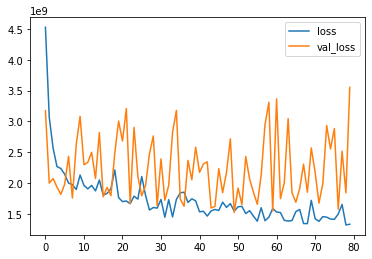

In [20]:
losses = pd.DataFrame(model.history.history) 
losses.plot()

In [21]:
predictions = model.predict(x_test)
met.mean_absolute_error(y_test,predictions)

45919.878438035106

In [22]:
#Fit model to test set
test.drop('SalePrice',inplace = True, axis =1)

pred_RF = bestF.predict(test)
pred_NN = MLP.predict(test)
#pred_LG = model_linReg.predict(test_linReg)
pred_XG = xg_reg.predict(test)
pred_TF = model.predict(test)


/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Print Outputs to Test on Kaggle

<p>

In [23]:
# Creaete Table
output_RF = pd.DataFrame( { 'id': test_ids['Id'], 'SalePrice': pred_RF} )

output_NN = pd.DataFrame( { 'id': test_ids['Id'], 'SalePrice': pred_NN} )

#output_LG = pd.DataFrame( { 'id': test_ids['Id'], 'SalePrice': pred_LG} )

output_XG = pd.DataFrame( { 'id': test_ids['Id'], 'SalePrice': pred_XG} )

output_TF = pd.DataFrame( { 'id': test_ids['Id'], 'SalePrice': pred_TF.ravel()} )


In [24]:
output_NN.to_csv('SupportingFiles/LG_submission.csv',index = False)
output_NN.to_csv('SupportingFiles/NN_submission.csv',index = False)
output_RF.to_csv('SupportingFiles/RF_submission.csv',index = False)
output_XG.to_csv('SupportingFiles/XG_submission.csv',index = False)
output_TF.to_csv('SupportingFiles/TF_submission.csv',index = False)